In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPooling2D
from keras.optimizers import Adam
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
 data=[]
 label=[]
 path="/content/drive/My Drive/DATA/data_mask_no-mask"
 for i in os.listdir(path):
   npath=os.path.join(path,i)
   for j in os.listdir(npath):
     pp=os.path.join(npath,j)
     img=cv2.imread(pp)
     img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
     img=cv2.resize(img,(100,100))
     data.append(img)
     if(i=='with mask'):
       label.append(0)
     else:
        label.append(1)

In [4]:
data=np.array(data)/255.0
data.shape

(1376, 100, 100)

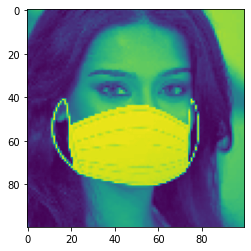

In [5]:
plt.imshow(data[1000])

In [6]:
from keras.utils import np_utils
label=np.array(label)
label=np_utils.to_categorical(label)
label[0].shape

(2,)

In [11]:
label[1000]

array([1., 0.], dtype=float32)

In [12]:
model=Sequential()
model.add(Conv2D(200,(3,3),input_shape=(100,100,1),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(100,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_label,test_label=train_test_split(data,label,test_size=0.1)
train_data.shape

(1238, 100, 100)

In [15]:
train_dat=np.reshape(train_data,(1238,100,100,1))
print(train_dat.shape)

(1238, 100, 100, 1)


In [16]:
test_label.shape

(138, 2)

In [17]:
model.fit(train_dat,train_label,epochs=30,validation_split=0.2)

Epoch 1/30
31/31 [==============================] - 3s 111ms/step - loss: 0.8249 - accuracy: 0.5374 - val_loss: 0.6740 - val_accuracy: 0.6532
Epoch 2/30
31/31 [==============================] - 3s 83ms/step - loss: 0.5427 - accuracy: 0.7212 - val_loss: 0.4719 - val_accuracy: 0.7782
Epoch 3/30
31/31 [==============================] - 3s 83ms/step - loss: 0.3444 - accuracy: 0.8515 - val_loss: 0.3376 - val_accuracy: 0.8508
Epoch 4/30
31/31 [==============================] - 3s 84ms/step - loss: 0.2584 - accuracy: 0.9000 - val_loss: 0.3288 - val_accuracy: 0.8831
Epoch 5/30
31/31 [==============================] - 3s 83ms/step - loss: 0.1570 - accuracy: 0.9424 - val_loss: 0.2952 - val_accuracy: 0.9032
Epoch 6/30
31/31 [==============================] - 3s 84ms/step - loss: 0.1627 - accuracy: 0.9364 - val_loss: 0.2420 - val_accuracy: 0.9194
Epoch 7/30
31/31 [==============================] - 3s 84ms/step - loss: 0.1083 - accuracy: 0.9697 - val_loss: 0.2294 - val_accuracy: 0.9234
Epoch 8/30
3

In [18]:
test_dat=np.reshape(test_data,(138,100,100,1))

In [19]:
model.evaluate(test_dat,test_label)

5/5 [==============================] - 0s 57ms/step - loss: 0.1599 - accuracy: 0.9493


[0.1599322110414505, 0.9492753744125366]

In [21]:
model.save('/content/drive/My Drive/DATA/model-mask-nomask.model')

INFO:tensorflow:Assets written to: /content/drive/My Drive/DATA/model-mask-nomask.model/assets


In [22]:
newmodel= keras.models.load_model('/content/drive/My Drive/DATA/model-mask-nomask.model')

In [23]:
train_dat[0].shape

(100, 100, 1)

In [30]:
ans=newmodel.predict(np.array([train_dat[1000]]))

In [31]:
np.argmax(ans)

0

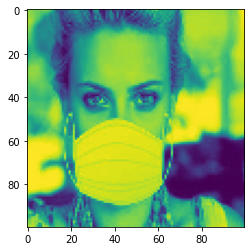

In [32]:
i=np.reshape(train_dat[1000],(100,100))
plt.imshow(i)